In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('insurance.csv', sep = ',')

In [4]:
df
print('Hello')

Hello


In [22]:
df.shape
print('Number of rows: '+ format(df.shape[0]) +', number of features: '+ format(df.shape[1]))

Number of rows: 1338, number of features: 7


In [23]:
df.head()
#Quality of Dataset
print("Missing values per column", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values per column age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Duplicate rows: 1


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Missing Values
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Summary Statistics
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    

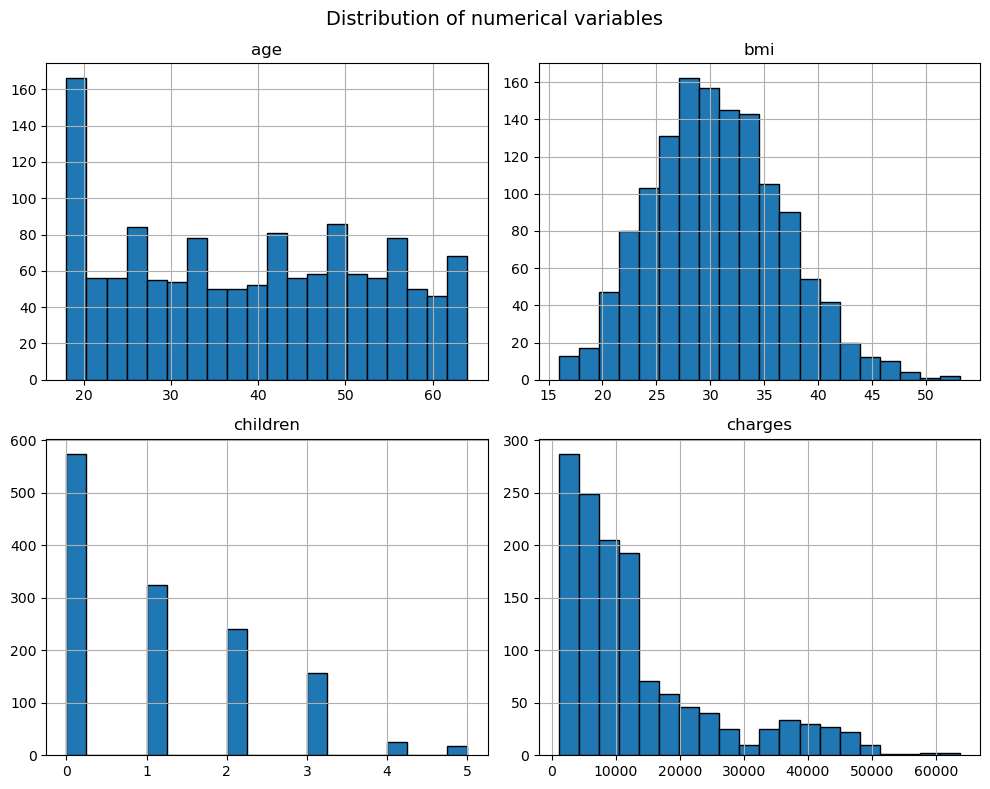

C:\Users\treic\AppData\Local\Temp\ipykernel_25140\2000382915.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoker', palette='Set2')


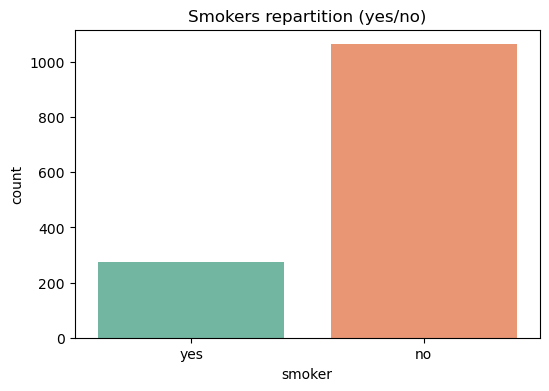

C:\Users\treic\AppData\Local\Temp\ipykernel_25140\2000382915.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='pastel')


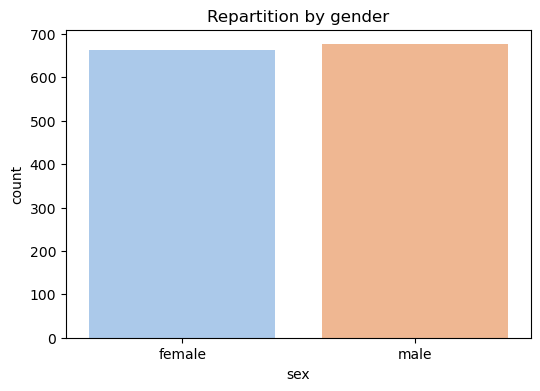

C:\Users\treic\AppData\Local\Temp\ipykernel_25140\2000382915.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='smoker', y='charges', palette='coolwarm')


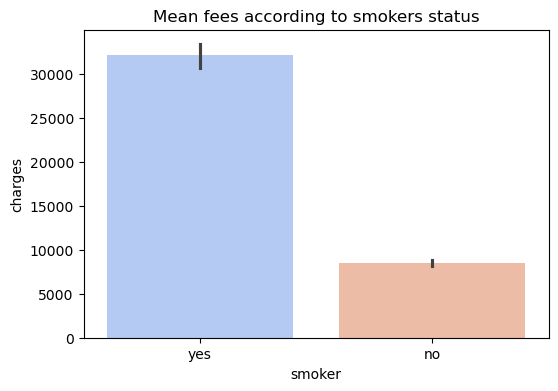

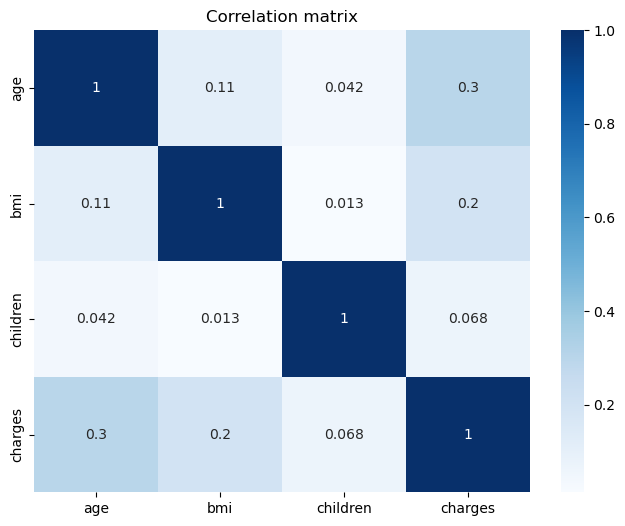

In [24]:
# 1. DESCRIPTIVE ANALYSIS

print("Dataset Info")
print(df.info())

print("Missing Values")
print(df.isnull().sum())

print("Summary Statistics")
print(df.describe())

print("Count of categorized values")
for col in ['sex', 'smoker', 'region']:
    print(f"\n{col}:\n", df[col].value_counts())

df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of numerical variables", fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='smoker', palette='Set2')
plt.title("Smokers repartition (yes/no)")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', palette='pastel')
plt.title("Repartition by gender")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='smoker', y='charges', palette='coolwarm')
plt.title("Mean fees according to smokers status")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation matrix")
plt.show()


In [25]:
# 2. DATA PREPROCESSING

le = LabelEncoder()
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Target
X = df.drop('charges', axis=1)
y = df['charges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 8)
X_test shape: (268, 8)
y_train shape: (1070,)
y_test shape: (268,)


 3. We want to predict the insurance cost of policyholders based on their profiles, and since the target value is numerical, we will perform a regression analysis.

In [26]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Baseline Model: Linear Regression")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Baseline Model: Linear Regression
MAE: 4181.194473753652
RMSE: 5796.284659276275
R²: 0.7835929767120722


In [27]:
# 3.1 Cross-validation for the Linear Regression baseline

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
lin_reg = LinearRegression()

cv_mae = -cross_val_score(lin_reg, X_train, y_train,
                          cv=kfold, scoring="neg_mean_absolute_error")
cv_r2 = cross_val_score(lin_reg, X_train, y_train,
                        cv=kfold, scoring="r2")

print("Linear Regression - 5-fold CV")
print(f"MAE (mean ± std): {cv_mae.mean():.2f} ± {cv_mae.std():.2f}")
print(f"R²  (mean ± std): {cv_r2.mean():.3f} ± {cv_r2.std():.3f}")


Linear Regression - 5-fold CV
MAE (mean ± std): 4234.98 ± 248.01
R²  (mean ± std): 0.739 ± 0.031


In [28]:
# 4. Random Forest Regressor with hyperparameter tuning (GridSearchCV)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Random Forest parameters:", grid_rf.best_params_)
print("Best CV MAE (neg):", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_

# Evaluation on the test set
y_pred_rf = best_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest (tuned) - Test performance")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)


Best Random Forest parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best CV MAE (neg): -2641.068090829622

Random Forest (tuned) - Test performance
MAE: 2557.1317288212804
RMSE: 4445.144237782002
R²: 0.8727248390062784


In [29]:
# 5. Model comparison (Linear Regression vs Random Forest)

results = pd.DataFrame({
    "Model": ["Linear Regression (baseline)", "Random Forest (tuned)"],
    "MAE": [mae, mae_rf],
    "RMSE": [rmse, rmse_rf],
    "R²": [r2, r2_rf]
})

print(results)


                          Model          MAE         RMSE        R²
0  Linear Regression (baseline)  4181.194474  5796.284659  0.783593
1         Random Forest (tuned)  2557.131729  4445.144238  0.872725


Partie Sara

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from scipy import stats

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
print("Dataset shape:", df.shape)
print("\nFirst rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nStats:")
print(df.describe())

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Remove duplicates
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("Removed duplicates")

# Check categorical variables
print("\nSex distribution:")
print(df['sex'].value_counts())
print("\nSmoker distribution:")
print(df['smoker'].value_counts())
print("\nRegion distribution:")
print(df['region'].value_counts())

# Some plots
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='smoker')
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='sex')
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='region')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='smoker', y='charges')
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='sex', y='charges')
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='region', y='charges')
plt.tight_layout()
plt.show()

#Correlation Matrix
df_temp = df.copy()
df_temp['sex'] = df_temp['sex'].map({'female': 0, 'male': 1})
df_temp['smoker'] = df_temp['smoker'].map({'no': 0, 'yes': 1})
corr = df_temp[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
print("\nCorrelations with charges:")
print(corr['charges'].sort_values(ascending=False))

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker')
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='children', y='charges')
plt.tight_layout()
plt.show()

In [ ]:
# Outliers detection
def find_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

for col in ['age', 'bmi', 'children', 'charges']:
    outliers, lower, upper = find_outliers(df, col)
    print(f"\n{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

In [ ]:
##Plot outliers
fig, axes = plt.subplots(1, 4, figsize=(14, 3))
for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
plt.show()

print("Keeping outliers because they are valid data")